In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from top2vec import Top2Vec
from project_functions import *

c:\Users\luraza\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the model

In [2]:
model = Top2Vec.load("multlingual-ngram-10-500-150-0-100")

In [3]:
model.embedding_model

'universal-sentence-encoder-multilingual-large'

## Evaluation

### Number of topics

In [4]:
model.get_num_topics()

38

### Topic sizes

In [5]:
model.get_topic_sizes()

(array([11514,  9197,  7679,  2232,  1736,  1395,  1323,  1008,   965,
          781,   780,   733,   699,   691,   663,   629,   559,   547,
          533,   493,   490,   457,   448,   427,   398,   353,   318,
          295,   285,   271,   256,   245,   230,   209,   149,   132,
          129,   125], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37], dtype=int64))

<AxesSubplot: ylabel='Frequency'>

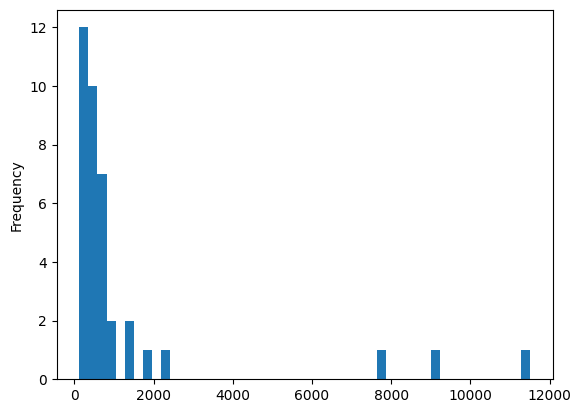

In [6]:
pd.Series(model.get_topic_sizes()[0]).plot(kind="hist", bins=50)

In [7]:
pd.Series(model.get_topic_sizes()[0]).describe()

count       38.000000
mean      1299.315789
std       2504.365940
min        125.000000
25%        287.500000
50%        513.000000
75%        780.750000
max      11514.000000
dtype: float64

### Topic words and scores

In [8]:
topic_words, topic_scores, topic_nums = model.get_topics(reduced=False)
for words, scores, num in zip(topic_words, topic_scores, topic_nums):
    print(f"Topic {num}\n{words[:5]}\n")

Topic 0
['dark souls' 'soulsborne' 'darksouls' 'bloodborne' 'soulsbourne']

Topic 1
['fps' 'gameplay' 'unplayable' 'vsync' 'laggy']

Topic 2
['ever played' 'gameplay' 'git gud' 'game' 'juego']

Topic 3
['botw' 'meh' 'foe' 'shit' 'ck']

Topic 4
['good' 'gud' 'excellent' 'decent' 'well']

Topic 5
['multiplayer' 'coop' 'singleplayer' 'matchmaking' 'mmo']

Topic 6
['dying' 'dies' 'dead' 'death' 'died']

Topic 7
['elden ring' 'eldenring' 'ring' 'rings' 'elden']

Topic 8
['ultrawide support' 'ultrawide' 'vsync' 'fps' 'widescreen']

Topic 9
['game' 'juego' 'jogo' 'games' 'gameplay']

Topic 10
['refunded' 'refunding' 'refund' 'returned' 'returning']

Topic 11
['good' 'game' 'gud' 'juego' 'excellent']

Topic 12
['invisible' 'unplayable' 'glitches' 'enemies' 'glitch']

Topic 13
['fun' 'enjoyable' 'enjoying' 'enjoyment' 'entertaining']

Topic 14
['game' 'gameplay' 'juego' 'jogo' 'great']

Topic 15
['review' 'reviews' 'criticism' 'comments' 'reviewers']

Topic 16
['finger' 'hole' 'fingers' 'try' '

### Sanity check: Representative documents per topic

In [9]:
topic_num = 34
num_docs = 5

documents, document_scores, document_ids = model.search_documents_by_topic(topic_num, num_docs)
for doc, score, id in zip(documents, document_scores, document_ids):
    print(f"Document: {id}, Score: {score:.4f}")
    print("-----------------------------")
    print(doc + "\n")

Document: 27788, Score: 0.9722
-----------------------------
MId

Document: 27597, Score: 0.9722
-----------------------------
mid

Document: 33561, Score: 0.9722
-----------------------------
mid

Document: 43820, Score: 0.9722
-----------------------------
Mid

Document: 31549, Score: 0.9722
-----------------------------
Mid



### Sanity check: search documents by keyword

In [10]:
num_topics = 3
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["katana"], num_topics=num_topics)
for tWords, wScores, tScores, tNums in zip(topic_words, word_scores, topic_scores, topic_nums):
    print("Topic: {topic}, Score: {similarity:.4f}\n{words}\n".format(topic=tNums, similarity=tScores, words=tWords[:10]))

Topic: 22, Score: 0.7009
['greatsword' 'sword' 'katana' 'swords' 'katanas' 'blade' 'knife'
 'samurai' 'malenia blade' 'weapon']

Topic: 3, Score: 0.5237
['botw' 'meh' 'foe' 'shit' 'ck' 'blah' 'bruh' 'fucking' 'sh' 'heck']

Topic: 25, Score: 0.3983
['eh' 'se' 'ah' 'oh' 'th' 'af' 'ai' 'tho' 'he' 'er']



## Reducing the number of topics

In [11]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [12]:
reduced = True

In [13]:
topic_words, topic_scores, topic_nums = model.get_topics(reduced=reduced)
for words, scores, num in zip(topic_words, topic_scores, topic_nums):
    print(f"Topic {num}\n{words[:5]}\n")

Topic 0
['dark souls' 'soulsborne' 'darksouls' 'bloodborne' 'soulsbourne']

Topic 1
['fps' 'gameplay' 'unplayable' 'vsync' 'laggy']

Topic 2
['ever played' 'gameplay' 'git gud' 'game' 'juego']

Topic 3
['meh' 'blah' 'botw' 'eh' 'heck']

Topic 4
['malenia fuck' 'fuck malenia' 'malenia blade' 'meh' 'greatsword']

Topic 5
['good' 'gud' 'excellent' 'decent' 'nice']

Topic 6
['multiplayer' 'mmo' 'git gud' 'matchmaking' 'singleplayer']

Topic 7
['elden ring' 'eldenring' 'ring' 'rings' 'elden']

Topic 8
['dying' 'dies' 'dead' 'died' 'death']

Topic 9
['refunded' 'refund' 'refunding' 'replayable' 'unplayable']

Topic 10
['gameplay' 'game' 'ever played' 'juego' 'jogo']

Topic 11
['unplayable' 'glitches' 'invisible' 'glitch' 'bugged']

Topic 12
['game' 'juego' 'jogo' 'games' 'gameplay']

Topic 13
['ultrawide support' 'vsync' 'ultrawide' 'fps' 'widescreen']

Topic 14
['review' 'reviews' 'criticism' 'gameplay' 'overrated']

Topic 15
['maidenless' 'nor' 'maiden' 'not' 'maidens']

Topic 16
['git gud

In [14]:
topic_num = 4
num_docs = 5

documents, document_scores, document_ids = model.search_documents_by_topic(topic_num, num_docs, reduced=reduced)
for doc, score, id in zip(documents, document_scores, document_ids):
    print(f"Document: {id}, Score: {score:.4f}")
    print("-----------------------------")
    print(doc + "\n")

Document: 20708, Score: 0.6267
-----------------------------
rannussy gave me thy scarlet rot

Document: 44665, Score: 0.6241
-----------------------------
Хуйня для нубов, марио и то пизже.

Document: 49271, Score: 0.6233
-----------------------------
Bad gfame no plaqy MIYAZAKI

Document: 19702, Score: 0.6113
-----------------------------
12 Malenias out of 10 blades of Miquella.

Document: 36943, Score: 0.6081
-----------------------------
Fuck you miyazaki, ya cunt!!!!!!!!



# Comparing over classes

In [15]:
df = pd.read_csv("er-reviews.csv")

In [16]:
# topic_sizes_by_class(model, df.voted_up, reduced=reduced)

Text(0.5, 1.0, 'Topic sizes by class')

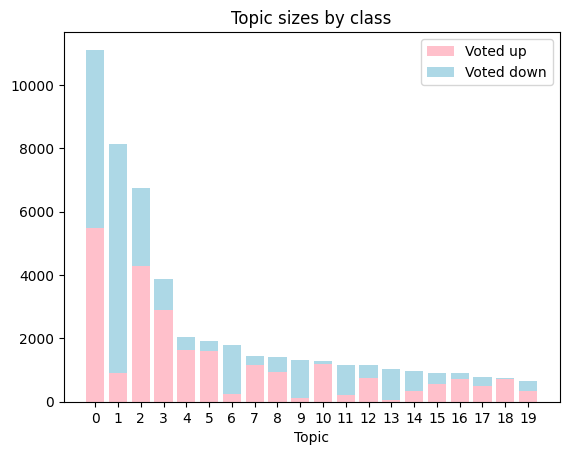

In [17]:
import matplotlib.pyplot as plt
size_by_class = topic_sizes_by_class(model, df.voted_up, reduced=reduced)
x = size_by_class.xs((1), level="class").tolist()
y = size_by_class.xs((0), level="class").tolist()
l = range(0, len(x))
plt.bar(l, x, color="pink", label="Voted up")
plt.bar(l, y, bottom=x, color="lightblue", label="Voted down")
plt.legend()
plt.xlabel("Topic")
plt.xticks(range(0,20))
plt.title("Topic sizes by class")

In [18]:
# More negative = larger number of negative reviews in topic
topic_sizes_by_class(model, df.voted_up, reduced=reduced).groupby("topic").diff().dropna().sort_values().xs(1, level="class", drop_level=True)


topic
1    -6315.0
6    -1343.0
9    -1061.0
13    -933.0
11    -739.0
14    -307.0
0     -149.0
19      23.0
15     212.0
17     227.0
12     357.0
8      431.0
16     505.0
18     696.0
7      896.0
10    1103.0
4     1219.0
5     1316.0
2     1853.0
3     1933.0
dtype: float64

In [19]:
# topic_num = 1
# topic_sizes_by_class(model, df.voted_up, reduced=reduced).xs(topic_num, level="topic", drop_level=False)

In [20]:
vector_dictionary = find_new_centers(model, df.voted_up, reduced=reduced)

top_vec_negative = vector_dictionary.get(0)
top_vec_positive = vector_dictionary.get(1)

In [21]:
# Similarity between topic vectors between classes
np.array([np.inner(x, y) for x,y in zip(top_vec_negative, top_vec_positive)])

array([0.96210134, 0.9639979 , 0.9539665 , 0.94547856, 0.95064193,
       0.86361414, 0.96225953, 0.9626671 , 0.8813095 , 0.9101274 ,
       0.9348498 , 0.8746675 , 0.9062441 , 0.9556165 , 0.964859  ,
       0.8546722 , 0.90174663, 0.8830295 , 0.9469801 , 0.9695737 ],
      dtype=float32)

In [22]:
# Similarity between topic vectors between classes (first in list = most dissimilar)
np.array([np.inner(x, y) for x,y in zip(top_vec_negative, top_vec_positive)]).argsort()

array([15,  5, 11,  8, 17, 16, 12,  9, 10,  3, 18,  4,  2, 13,  0,  6,  7,
        1, 14, 19], dtype=int64)

#### Original and re-calculated topic vectors

Displays the top *N* words most similar to the original topic vectors as well as the re-calculated topic vectors for positive and negative reviews. 

In [31]:
top_vec_negative.shape

(20, 512)

In [32]:
model.topic_vectors

array([[-0.05917594, -0.0043406 , -0.00857279, ..., -0.01464983,
         0.0311786 ,  0.03682232],
       [-0.00909148,  0.0070102 , -0.01804753, ..., -0.04014755,
         0.00314289,  0.00054873],
       [-0.01137928, -0.01709233,  0.07103041, ..., -0.0804855 ,
         0.00295859,  0.01832342],
       ...,
       [-0.01564791, -0.00376435,  0.01309484, ...,  0.00996506,
        -0.0167313 , -0.02210349],
       [ 0.02390127, -0.02098668,  0.01827656, ..., -0.01605559,
         0.00313891,  0.01671798],
       [ 0.00296467,  0.07163057,  0.0451609 , ..., -0.04106568,
         0.12270503, -0.04718956]], dtype=float32)

In [33]:
num_words = 5
for top, (all, neg, pos) in enumerate(zip(model.topic_vectors_reduced, top_vec_negative, top_vec_positive)):
    aWords, aScores = model.search_words_by_vector(all, num_words)
    nWords, nScores = model.search_words_by_vector(neg, num_words)
    pWords, pScores = model.search_words_by_vector(pos, num_words)
    print(f"Topic: {top}")
    print(f"Original: {aWords}")
    print(f"Negative: {nWords}")
    print(f"Positive: {pWords}")
    print()

Topic: 0
Original: ['dark souls' 'soulsborne' 'darksouls' 'bloodborne' 'soulsbourne']
Negative: ['dark souls' 'soulsborne' 'darksouls' 'bloodborne' 'soulsbourne']
Positive: ['dark souls' 'soulsborne' 'darksouls' 'bloodborne' 'soulsbourne']

Topic: 1
Original: ['fps' 'gameplay' 'unplayable' 'vsync' 'laggy']
Negative: ['fps' 'gameplay' 'unplayable' 'vsync' 'laggy']
Positive: ['fps' 'gameplay' 'framerate' 'performance issues' 'vsync']

Topic: 2
Original: ['ever played' 'gameplay' 'git gud' 'game' 'juego']
Negative: ['gameplay' 'git gud' 'ever played' 'game' 'juego']
Positive: ['ever played' 'gameplay' 'game' 'juego' 'jogo']

Topic: 3
Original: ['meh' 'blah' 'botw' 'eh' 'heck']
Negative: ['meh' 'shit' 'blah' 'fucking' 'botw']
Positive: ['meh' 'blah' 'eh' 'heck' 'botw']

Topic: 4
Original: ['malenia fuck' 'fuck malenia' 'malenia blade' 'meh' 'greatsword']
Negative: ['bruh' 'lmao' 'malenia fuck' 'goddamn' 'fuck']
Positive: ['malenia fuck' 'meh' 'fuck malenia' 'greatsword' 'lmao']

Topic: 5
O

#### Difference between original and re-calculated topic vectors

Searches for and displays words similar to the *difference* between the original topic vectors and re-calculated positive and negative topic vectors.

In [34]:
num_words = 5
for top, (all, neg, pos) in enumerate(zip(model.topic_vectors_reduced, top_vec_negative, top_vec_positive)):

    O_words, _ = model.search_words_by_vector(all, num_words)
    OP_words, _ = model.search_words_by_vector(all - pos, num_words)
    ON_words, _ = model.search_words_by_vector(all - neg, num_words)
    PN_words, _ = model.search_words_by_vector(pos - neg, num_words)
    NP_words, _ = model.search_words_by_vector(neg - pos, num_words)

    print(f"Topic: {top}")
    print(f"Original:          {O_words}")
    print(f"Original-Positive: {OP_words}")
    print(f"Original-Negative: {ON_words}")
    print(f"Negative-Positive: {NP_words}")
    print(f"Positive-Negative: {PN_words}")
    print()


Topic: 0
Original:          ['dark souls' 'soulsborne' 'darksouls' 'bloodborne' 'soulsbourne']
Original-Positive: ['negatives' 'sucks' 'complaints' 'worst' 'shitty']
Original-Negative: ['soulsborne' 'dark souls' 'soulsbourne' 'souls' 'darksouls']
Negative-Positive: ['negatives' 'complaints' 'worst' 'sucks' 'negative']
Positive-Negative: ['soulsborne' 'dark souls' 'soulsbourne' 'souls' 'darksouls']

Topic: 1
Original:          ['fps' 'gameplay' 'unplayable' 'vsync' 'laggy']
Original-Positive: ['unplayable' 'couldnt' 'gamepad' 'cant' 'cannot']
Original-Negative: ['respawn' 'screwed' 'recover' 'reset' 'replay']
Negative-Positive: ['pc port' 'gamepad' 'couldnt' 'unplayable' 'cant']
Positive-Negative: ['performance' 'phenomenal' 'outstanding' 'spectacular'
 'performance issues']

Topic: 2
Original:          ['ever played' 'gameplay' 'git gud' 'game' 'juego']
Original-Positive: ['worst' 'shitty' 'bad' 'worse' 'sucks']
Original-Negative: ['greatest' 'best' 'magnificent' 'superb' 'amazing']
Ne

#### Documents from differences in topic vectors

It appears that Negative-Positive consistently returns documents with negative sentiment, and vice versa for Positive-Negative. The same does not seem to be true in every case for Original-Positive or Original-Negative (topic 6 for example).

When there is a difference in the representative word vectors for original, positive, and negative, the returned documents seem to consistently reflect that. Take for example topic 5, for which Original returns words related to the online experience; Positive returns praise words; and Negative returns denouncements.

Subtracting away the re-calculated positive topic vector seems to consistently result in more negative reviews being returned. This seems doubly true for Negative-Positive, and doubly vice versa for Positive-Negative.

In [35]:
topic = 5
num_docs = 2
for top, (all, neg, pos) in enumerate(zip(model.topic_vectors_reduced, top_vec_negative, top_vec_positive)):
    if top == topic:
        O_words, _, _ = model.search_documents_by_vector(all, num_docs)
        OP_words, _, _ = model.search_documents_by_vector(all - pos, num_docs)
        ON_words, _, _ = model.search_documents_by_vector(all - neg, num_docs)
        PN_words, _, _ = model.search_documents_by_vector(pos - neg, num_docs)
        NP_words, _, _ = model.search_documents_by_vector(neg - pos, num_docs)

        print(f"Original:\n{O_words}\n")
        print(f"Original-Positive:\n{OP_words}\n")
        print(f"Original-Negative:\n{ON_words}\n")
        print(f"Negative-Positive:\n{NP_words}\n")
        print(f"Positive-Negative:\n{PN_words}\n")
        print()


Original:
['rly good ' 'Super gut']

Original-Positive:
['Performance is so bad, unplayable.' 'bad performance = bad game']

Original-Negative:
['yeah good!' 'very good very nice']

Negative-Positive:
['Bad port with terrible performance.' 'Horrible performance issues.']

Positive-Negative:
['mantep ' '非常棒']




#### Document by topic vector difference

In [26]:
num_docs = 3
topic = 14

for top, (all, neg, pos) in enumerate(zip(model.topic_vectors, top_vec_negative, top_vec_positive)):
    if top == topic:
        original = all
        positive_negative = pos - neg
        negative_positive = neg - pos

        orig, _, _ = model.search_documents_by_vector(original, num_docs)
        posneg, _, _ = model.search_documents_by_vector(positive_negative, num_docs)
        negpos, _, _ = model.search_documents_by_vector(negative_positive, num_docs)
        print(f"          Original: {orig}\n")
        print(f"Positive-Negative : {posneg}\n")
        print(f"Negative-Positive : {negpos}\n")


          Original: ['GREAT GAME' 'Great game' 'great game']

Positive-Negative : ['I would write a more indepth review, but im too busy playing Elden Ring.'
 'YOU ARE READING REVIEWS WHEN YOU COULD BE PLAYING ELDEN RING WHY BRO'
 "I would write a more in-depth review, but I'm too busy playing Elden Ring."]

Negative-Positive : ["Constant fps drops and stuttering, invisible enemies due to rendering bugs and overall unplayable. Fix the game edit: Almost been a month since release, game is so bugged i can't play it still. no updates on whats going on with it and i've spent over 2 hours trying to fix the damn bugs meaning i now can't refund nor can i even play the game "
 'Game drops to 1fps every 30 seconds for me. Tried every fix online, nothing helped. Until a patch comes out that fixes the PC issues this game will remain refunded for me.'
 'Unplayable. Stuttering is bad like players have said, which actually got WORSE when I turned down graphics. Invisible enemies. All of them. I saw 

In [27]:
# Intra-topic average similarity
np.array([np.mean([np.inner(doc, model.topic_vectors[topic]) for doc in model.document_vectors[model.doc_top==topic]]) for topic in range(0, num_topics)])

array([0.67066616, 0.6164254 , 0.5791541 ], dtype=float32)

In [28]:
# Intra-topic average similarity (reduced)
num_topics_reduced = len(model.topic_vectors_reduced)
np.array([np.mean([np.inner(doc, model.topic_vectors_reduced[topic]) for doc in model.document_vectors[model.doc_top_reduced==topic]]) for topic in range(0, num_topics_reduced)])

array([0.6753856 , 0.6305023 , 0.58394027, 0.60104275, 0.3994374 ,
       0.75726867, 0.59837514, 0.64872974, 0.44734168, 0.5659002 ,
       0.74319506, 0.5112598 , 0.66213065, 0.6585727 , 0.6181389 ,
       0.5608183 , 0.79413384, 0.5968408 , 0.7860739 , 0.647532  ],
      dtype=float32)